In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def variance_of_laplacian(image):
    return cv.Laplacian(image, cv.CV_64F).var()

Text(0.5, 1.0, '106.60511290906896')

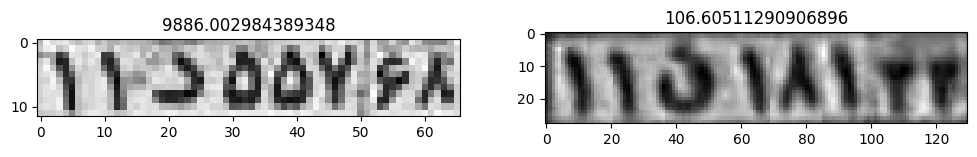

In [4]:
image1 = cv.imread(r"D:\Opencv\class.vision-master\images\plate_cropped.jpg",0)
image2 = cv.imread(r"D:\Opencv\class.vision-master\images\plate3_cropped.jpg",0)

metric_image1 = variance_of_laplacian(image1)
metric_image2 = variance_of_laplacian(image2)

plt.figure(figsize=[12,7])
plt.subplot(121);plt.imshow(image1,cmap='gray');plt.title(metric_image1)
plt.subplot(122);plt.imshow(image2,cmap='gray');plt.title(metric_image2)

In [6]:
th = 100
cap = cv.VideoCapture(0)

while True:
    ret, frame = cap.read()
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    metric = variance_of_laplacian(gray)
    
    color = (0,0,255)
    if metric > 200:
        color = (0,255,0)
    cv.putText(frame, str(metric), (30,30), cv.FONT_HERSHEY_COMPLEX, 1, color)
    cv.imshow('Webcam', frame)
    if cv.waitKey(1) & 0xff == 27:
        break
            
cap.release()
cv.destroyAllWindows()